In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve


def load_data(file):
    """
    Função para carregamento de arquivo 
    
    """
    path = input('Por favor adicione o diretório de trabalho?')
    for dirname, _, filename in os.walk(path, topdown = True):
        for filename in filename:
            if filename == file:
                data = pd.read_csv(os.path.join(dirname,filename), header = None)
            else:
                pass
    print("Carregamento finalizado!!!")
    return data

X_treino = load_data('X_treino.csv')
y_treino = load_data('y_treino.csv')

Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


In [4]:
def random_cart(X_treino,y_treino,n_iter, model_name):
    
    print('> Procurando os melhores parametros...')
    splitter = ['best','random']
    max_features = ['auto', 'sqrt','log2']
    max_depth = [int(x) for x in np.linspace(10, 110, num = 7)]
    max_depth.append(None)
    criterion = ['gini','entropy']
    min_samples_split = [2, 5, 10, 12]
    min_samples_leaf = [1, 2, 4, 6, 8]
   
    

    random_grid = {'splitter' : splitter,
                   'max_features':max_features,
                   'criterion': criterion,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    

    random_state = 2
    cart = DecisionTreeClassifier()
    cart_random = RandomizedSearchCV(estimator = cart, param_distributions = random_grid, 
                                   n_iter = n_iter, cv = 3, verbose=1, random_state=random_state, 
                                   n_jobs = -1, scoring = {'roc_auc':'roc_auc'}, 
                                   refit='roc_auc')

    # Fit do modelo
    print('> Fitting Modelo...')
    model = cart_random.fit(X_treino, y_treino)
    filename = model_name
    pickle.dump(model.best_estimator_, open(filename, 'wb'))
    
    print('> Treinamento realizado...')
    return model.best_estimator_, model.cv_results_, model.best_params_

In [5]:
trained_model, results, params=random_cart(X_treino,y_treino,5, model_name='cart_model_0601.sav')

> Procurando os melhores parametros...
> Fitting Modelo...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.2s finished


> Treinamento realizado...


In [6]:
#Melhores Parametros
params

{'splitter': 'best',
 'min_samples_split': 12,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 76,
 'criterion': 'entropy'}

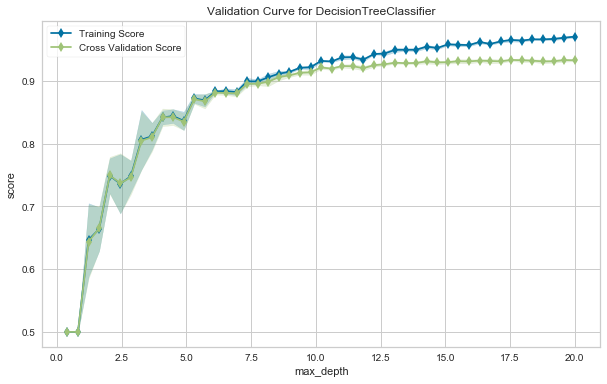

In [7]:
# Function
def validation_curve(model, X, y, param, rang, cv):
    
    f, ax  = plt.subplots(figsize=(10,6))
    viz = ValidationCurve(
    model, param_name=param,
    param_range=rang, cv=cv, scoring="roc_auc", n_jobs=-1
    )


    viz.fit(X, y)
    viz.show()
    plt.show()
    


validation_curve(trained_model, X_treino, y_treino, param='max_depth', rang=np.linspace(0,20), cv=5)

In [10]:
#Treinando modelo com os parametros encontrados

def fitting_model_cart(X, y, model_name, splitter='best' , max_features='sqrt', max_depth=13 , 
                       criterion='entropy', min_samples_split=2, min_samples_leaf=2, 
                       random_state=2):
    
    
    cart = DecisionTreeClassifier(splitter=splitter, max_features=max_features, max_depth=max_depth, criterion=criterion, 
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, 
                                  random_state=random_state)
    
    
    # Fit do modelo
    print('> Treinando Modelo...')
    model = cart.fit(X, y)
    filename = model_name
    pickle.dump(model, open(filename, 'wb'))
    print('> Modelo Treinado...')
    return model

modelo = fitting_model_cart(X_treino, y_treino, 'cart_model_1801.sav')

> Treinando Modelo...
> Modelo Treinado...
